<a href="https://colab.research.google.com/github/miohana/rnn-hello-world/blob/master/rnn_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hello world with Recurrent Neural Networks with Keras and Tensorflow

Here we can see examples of an implementation of a Recurrent Neural Network model with a simple dataset, using Tanh as activation function.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
np.random.seed(0)

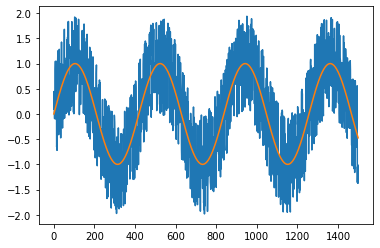

In [4]:
t = np.arange(0,1500)
x = np.sin(0.015*t) + np.random.uniform(low=-1, high=1, size=(1500,))
x_actual = np.sin(0.015*t)
plt.plot(x)
plt.plot(x_actual)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.53046776]
 [0.61911792]
 [0.56562058]
 ...
 [0.19383459]
 [0.1547965 ]
 [0.24593019]]


In [7]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [8]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
 
step = 10
trainX,trainY = createDataset(train,step)
testX,testY = createDataset(test,step)
print(trainX[0])

[[0.53046776]
 [0.61911792]
 [0.56562058]
 [0.5399316 ]
 [0.48194208]
 [0.59906553]
 [0.49667143]
 [0.73204294]
 [0.77249547]
 [0.48046345]]


In [9]:
print(trainY[0])

[0.69241117]


In [10]:
print(trainX.shape)

(990, 10, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [12]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
history = model.fit(trainX,trainY, epochs=500, batch_size=16, verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 990 samples
Epoch 1/500
990/990 - 1s - loss: 0.1734
Epoch 2/500
990/990 - 0s - loss: 0.1292
Epoch 3/500
990/990 - 0s - loss: 0.1026
Epoch 4/500
990/990 - 0s - loss: 0.0840
Epoch 5/500
990/990 - 0s - loss: 0.0708
Epoch 6/500
990/990 - 0s - loss: 0.0617
Epoch 7/500
990/990 - 0s - loss: 0.0554
Epoch 8/500
990/990 - 0s - loss: 0.0510
Epoch 9/500
990/990 - 0s - loss: 0.0477
Epoch 10/500
990/990 - 0s - loss: 0.0454
Epoch 11/500
990/990 - 0s - loss: 0.0437
Epoch 12/500
990/990 - 0s - loss: 0.0425
Epoch 13/500
990/990 - 0s - loss: 0.0414
Epoch 14/500
990/990 - 0s - loss: 0.0407
Epoch 15/500
990/990 - 0s - loss: 0.0400
Epoch 16/500
990/990 - 0s - loss: 0.0395
Epoch 17/500
990/990 - 0s - loss: 0.0391
Epoch 18/500
990/990 - 0s - loss: 0.0387
Epoch 19/500
990/990 - 0s - loss: 0.0384
Epoch 20/500
990/990 - 0s - loss: 0.0381
Epoch 21/500
990/990 - 0s - loss: 0.0379
Epoch 22/500
990/990 - 0s - loss: 0.0377
Epoch

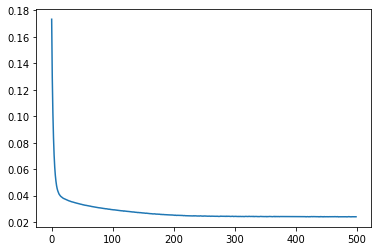

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
plt.plot(loss)

In [0]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict= normalizer.inverse_transform(model.predict(testX))
predicted= np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)

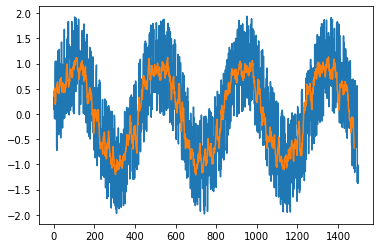

In [15]:
plt.plot(x)
plt.plot(predicted)
# plt.axvline(len(trainX), c="r")